<a href="https://colab.research.google.com/github/mokashis/AI-Agents-with-Crew/blob/main/CrewAI_multiAgent_class_from_deeplearningclass_codethatworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install crewai crewai_tools langchain_community

In [ ]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from crewai import Agent, Task, Crew, LLM

In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=f364750d3ac246eadbf0e1a5ca16bf4185247498674621069fa5f1899fc01015
  Stored in directory: /root/.cache/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils


In [ ]:
import os





Importing the API key - use either OpenAI (GPT4 model) or Gemini (1.5 flash). Dont run both cells:

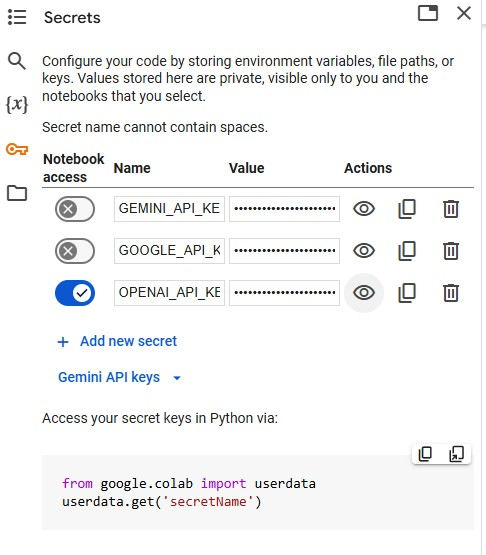

For Open AI API

In [ ]:
from google.colab import userdata
my_secret_key = userdata.get('OPENAI_API_KEY')

#openai_api_key = my_secret_key
os.environ["OPENAI_MODEL_NAME"] = 'gpt-4'
os.environ["OPENAI_API_KEY"] = my_secret_key
my_llm = LLM(
              model='gpt-4',
              api_key=os.environ["OPENAI_API_KEY"]
            )

For Gemini API

In [ ]:
from google.colab import userdata

my_secret_key_gemini = userdata.get('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = my_secret_key_gemini

my_llm = LLM(
              model='gemini/gemini-1.5-flash',
              api_key=os.environ["GOOGLE_API_KEY"]
            )


Creating Agents

Define your Agents, and provide them a role, goal and backstory.

It has been seen that LLMs perform better when they are role playing.

In [ ]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic}."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    allow_delegation=False,
    llm=my_llm,
	verbose=True
)

In [ ]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic}. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    allow_delegation=False,
    llm=my_llm,
    verbose=True
)

In [ ]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    llm=my_llm,
    verbose=True
)

Creating Tasks


In [ ]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

In [ ]:
write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
		"3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    agent=writer,
)

In [ ]:
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    agent=editor
)

In [ ]:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=True
)

In [ ]:
result = crew.kickoff(inputs={"topic": "Artificial Intelligence"})

# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on Artificial Intelligence.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


# Agent: Content Planner
## Final Answer: 
**Content Plan: Understanding and Navigating the World of Artificial Intelligence**

**1. Prioritized Trends, Key Players, and News:**

* **Trends:** Generative AI (e.g., DALL-E 2, Midjourney, Stable Diffusion, ChatGPT), AI-driven drug discovery,  responsible AI development (focus on bias mitigation and ethical considerations),  the rise of AI in cybersecurity,  AI-powered personalized learning, and the increasing use of AI in the metaverse.
* **Key Players:** OpenAI, Google (DeepMind), Microsoft, Amazon (AWS), Meta,  Nvidia,  Anthropic,  and various startups focused on specific AI applica

In [ ]:
from IPython.display import Markdown
Markdown(result.raw)

# Artificial Intelligence: The Everyday Reality and More

Artificial Intelligence (AI), a term first introduced in the mid-1950s by John McCarthy, is a unique discipline within computer science. It aspires to bestow software with the capacity not only to analyze its environment but also to learn from it, and make decisions independently. Today, AI's influence spans sectors ranging from healthcare to automotive, assisting with complex tasks such as medical diagnoses and autonomous driving.

## The Current Landscape: AI is Here and Now

Today's AI applications are wide-ranging and infiltrating industries in previously unthinkable ways. AI is playing a transformative role in healthcare, where machine learning algorithms aid in predicting patient outcomes and deep learning is utilized in image recognition for disease diagnoses. Industry titans like Google's DeepMind and Microsoft's Azure AI are at the forefront of these advancements. Impressively, OpenAI's GPT-3 model has shown noteworthy competence in natural language processing, underlining both AI's ongoing progression and potential. Examples of its successful implementation, like [insert case study hyperlink], demonstrate how AI can significantly enhance efficiency.

## Unraveling AI: Beyond the Jargon

To truly comprehend AI, it's vital to understand concepts like Machine Learning, Deep Learning, and Robotics. Machine Learning is the mechanism through which AI gains the ability to learn and improve from experience. Deep Learning, a subfield of machine learning, emulates the human brain in processing data and creating patterns used for decision making. Another AI application, robotics, is making strides in areas ranging from business automation to healthcare and entertainment.

## Peering into Tomorrow: AI's Future

As AI merges with big data and the Internet of Things, we are starting to witness ideas once thought fictional becoming reality. Nonetheless, this introduces new ethical questions around data privacy and accountability. In terms of employment, studies from [McKinsey](URL) and [PwC](URL) suggest AI's contribution to job creation could match job displacement, highlighting a potential necessity for workforce retraining.

## Embarking on Your AI Journey: Charting the Course

For those interested in AI, there are plenty of resources available - spanning online courses on platforms like Coursera, insightful podcasts, and enlightening books. The AI field boasts a rich variety of career paths, encompassing roles from data scientists to AI specialists. Essential future skills are likely to involve problem-solving, statistical reasoning, and programming.

## The Final Word: Navigating the AI Shift

The magnitude of AI's influence on daily life is significant and predicted to expand. Today's AI innovations often turn yesterday's fiction into today's fact. With this in mind, this could be an opportune time to engage with AI, whether to optimize your business operations or satisfy keen interest. 

Now that AI has permeated everyday lexicon, the real question is, will you be an observer of its progression or leverage its potential to drive innovation? Are you ready to grasp the AI-driven future we're crafting today? Your journey begins now.

In [ ]:
topic = "Hardware advancements for AI"
result = crew.kickoff(inputs={"topic": topic})

# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on Hardware advancements for AI.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


# Agent: Content Planner
## Final Answer: 
1. **Content Topic:** Hardware Advancements for Artificial Intelligence

2. **Target Audience:** The target audience consists of tech enthusiasts, AI developers, students studying computer science, engineers, and people interested in the future advancements of technology, specifically in hardware for AI. 

3. **Audience Interests and Pain Points:** The audience shows interest in staying updated on the latest trends on AI and its hardware, in understanding how these advancements will enhance the functioning of AI systems. The technical details would be interesting to them. A pain point

In [ ]:
Markdown(result)

# Unleashing the Power of Hardware Advancements in AI: A Comprehensive Guide

## Introduction
The field of Artificial Intelligence (AI) has been experiencing rapid growth, with hardware advancements playing a crucial role in enhancing AI capabilities. As AI applications become more complex and demanding, the need for innovative hardware solutions has become increasingly evident. Key players in the hardware industry are driving this innovation, pushing the boundaries of what is possible with AI technology.

## Latest Trends in Hardware Advancements for AI
One of the most exciting trends in hardware advancements for AI is the development of cutting-edge technologies such as neuromorphic computing, quantum computing, and specialized AI chips. These advancements are revolutionizing AI applications across various industries, enabling faster processing speeds, lower power consumption, and improved performance. Neuromorphic computing, inspired by the human brain's neural networks, offers a new approach to AI that mimics biological processes for more efficient and adaptive learning. Quantum computing, with its ability to perform complex calculations at an exponential speed, has the potential to revolutionize AI algorithms and problem-solving capabilities. Specialized AI chips, designed specifically for AI workloads, are optimizing performance and efficiency in AI applications, leading to significant advancements in machine learning and deep learning models.

## Key Players in the Hardware Industry
Leading companies like NVIDIA, Intel, AMD, and Google are at the forefront of developing hardware solutions for AI. These companies are constantly innovating and pushing the boundaries of hardware technology to meet the growing demands of AI applications. NVIDIA, known for its powerful graphics processing units (GPUs), has become a key player in the AI hardware market, offering high-performance solutions for deep learning and AI research. Intel, a longstanding leader in the semiconductor industry, has been investing heavily in AI hardware advancements, with a focus on developing efficient and scalable solutions for AI workloads. AMD, known for its central processing units (CPUs) and graphics cards, has also made significant contributions to advancing AI technology through hardware innovation. Google, with its AI-powered products and services, has developed a diverse portfolio of AI hardware offerings to support its AI research and development initiatives.

## Noteworthy News in Hardware Advancements for AI
Recent breakthroughs in hardware design have led to increased efficiency, scalability, and speed for AI workloads. These advancements are driving significant improvements in AI performance and capabilities, enabling more sophisticated AI applications across various industries. However, challenges such as data privacy, ethical considerations, and sustainability issues remain important considerations in the development of AI hardware solutions. As the field of AI continues to evolve, future directions in hardware development will focus on addressing these challenges while exploring new possibilities for AI technology.

### Conclusion
In conclusion, hardware advancements play a vital role in unleashing the full potential of AI technology. By staying informed about the latest trends and developments in AI hardware, professionals in the tech industry can leverage these advancements to drive innovation and growth in their organizations. As AI continues to transform industries and reshape the way we work and live, the integration of cutting-edge hardware solutions will be essential for unlocking new possibilities in AI applications. I encourage readers to explore the latest hardware advancements in AI technology and consider how they can integrate these solutions into their own projects or businesses for enhanced AI performance.

Sources:
- [NVIDIA's AI Hardware Solutions](Link to NVIDIA's AI hardware products)
- [Intel's Innovation in AI Hardware](Link to Intel's AI hardware advancements)
- [AMD's Role in Advancing AI Technology](Link to AMD's AI hardware solutions)
- [Google's AI Hardware Portfolio](Link to Google's AI hardware offerings)